In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

df = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv")
df.isnull().sum()   #0
df.describe()   #year	price	mileage	tax	mpg	engineSize
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [3]:
x = pd.DataFrame(data=df,columns=df.columns)
x.drop("price",axis=1,inplace=True)
y = df["price"]

In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if df[col].dtype != 'O']
df.nunique() #27 Model, 4 Transmission, 4 Fuel type

model             27
year              25
price           4424
transmission       4
mileage         9716
fuelType           4
tax               40
mpg              120
engineSize        26
dtype: int64

**HISTOGRAMS OF NUMERICAL VARIABLES**

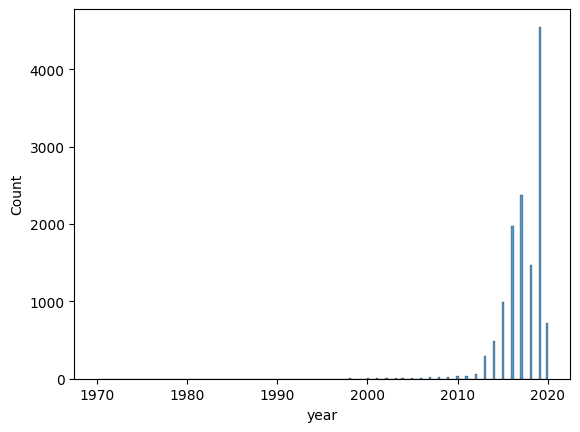

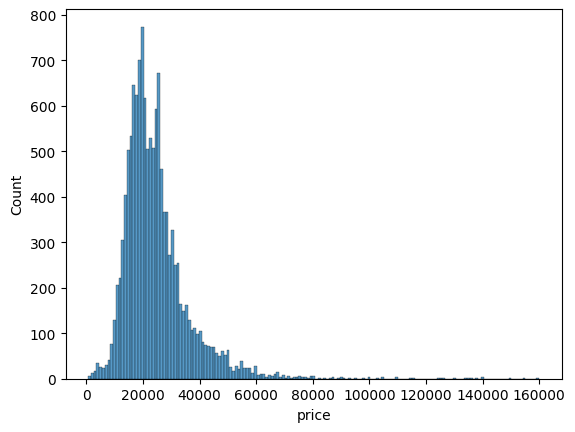

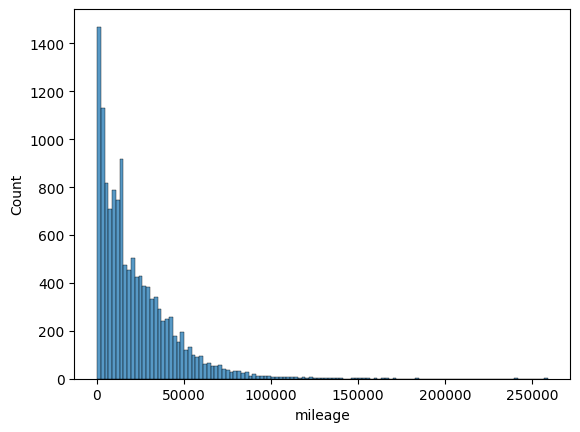

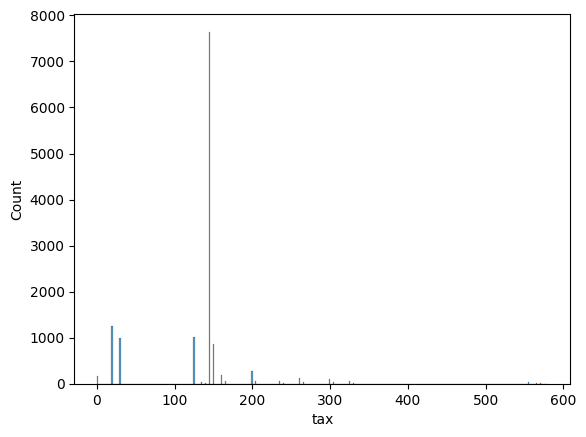

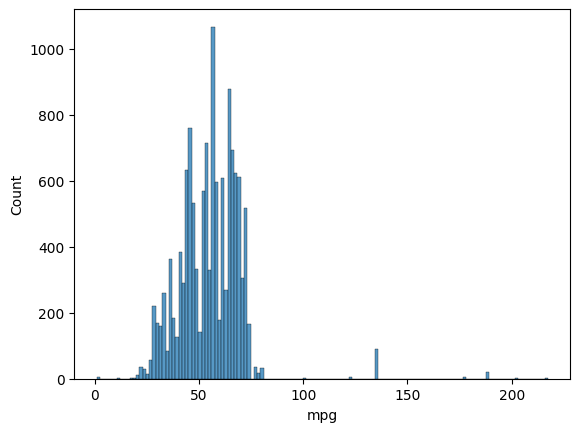

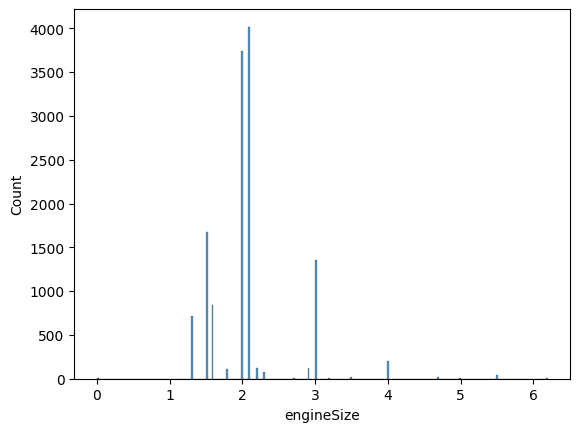

In [5]:
for col in num_cols:
    sns.histplot(df[col])
    plt.show()

When the distributions of numerical variables are examined, outliers stand out.

We will aim to minimize the impact of these variables.
We can remove them from variable or we can choose a scaler that is not affected by outliers

Now We will examine the effects of categorical variables on price.

**PRICE AVERAGES REGARDS TO CATEGORICAL VARIABLES**

In [6]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"Categorical Variable: {col}")
    print("{:<10} {:<10} {:<10}".format("Value","Mean","Std Deviation"))
    for val in unique_values:
        subset = df[df[col] == val]
        m=subset["price"].mean()
        s=subset["price"].std()
        print("{:<10} {:<10.2f} {:<10.2f}".format(val,m,s))
    print("="*30)

Categorical Variable: model
Value      Mean       Std Deviation
 SLK       10787.32   4974.02   
 S Class   45075.45   21439.05  
 SL CLASS  31217.44   16981.15  
 G Class   98934.20   42022.63  
 GLE Class 40183.86   12258.46  
 GLA Class 20427.66   4010.76   
 A Class   19849.60   11183.56  
 B Class   18896.83   6003.38   
 GLC Class 32929.40   9451.86   
 C Class   23695.82   8765.29   
 E Class   25481.42   10218.83  
 GL Class  21359.71   6699.42   
 CLS Class 26743.19   11493.38  
 CLC Class 5516.67    713.17    
 CLA Class 20836.06   7229.48   
 V Class   32446.62   11794.37  
 M Class   17365.94   5420.05   
 CL Class  21448.87   6082.81   
 GLS Class 47219.54   11154.43  
 GLB Class 37673.53   2918.70   
 X-CLASS   29695.11   5477.60   
180        10799.00   nan       
 CLK       3077.86    631.45    
 R Class   9474.50    3570.18   
230        4500.00    nan       
220        19995.00   nan       
200        19495.00   nan       
Categorical Variable: transmission
Value     

Transmission has 4 unique value but we can summarize it in two categories. One is (Automatic + Semi-Auto) and the other is (Manual + Other).
"fuel type" does not give a meaningful idea about the price. I'm thinking of separating them into Petrol and others

**CONVERTIONS OF FUEL TYPE AND TRANSMISSION**

In [7]:
def transmission_converter(row):
    if row["transmission"] == 'Automatic':
        return 1
    if row['transmission'] == 'Semi-Auto':
        return 1
    else:
        return 0
x["transmission2"]=x.apply(transmission_converter,axis=1)

In [8]:
def fueltype_converter (row):
     if row["fuelType"] == 'Petrol':
        return 1
     else:
        return 0
x["fuel"]=x.apply(fueltype_converter,axis=1)

**CONSTRUCT A NEW VARIABLE**

I think we can get a new variable from Mileage and year. 

In [9]:
max_year = x["year"].max()   #max year is 2020. I will take it as 2021. I'll take 2021 to avoid the number/0 inequality
max_year = max_year+1
x["age"] = (max_year - x["year"])
x["mpy"] = x["mileage"]/x["age"]

**ONE HOT ENCODER AND REMOVING CATEGORICAL VARIABLES**

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)

model = pd.DataFrame(data=x["model"])
model = ohe.fit_transform(model)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
x=x.drop("transmission",axis=1)
x=x.drop("fuelType",axis=1)
x=x.drop("model",axis=1)
x=x.drop("year",axis=1) #I will use age I don't need "year" anymore

In [12]:
model = pd.DataFrame(data=model)

In [13]:
x_train = pd.concat((x,model),axis=1)
#x_train=pd.DataFrame(data=x)

**OUTLIERS**

In [14]:
xf_train = pd.concat((x_train,y),axis=1)
xf_train = xf_train[xf_train["price"]<120000]
xf_train = xf_train[xf_train["mileage"]<200000]
xf_train = xf_train[xf_train["tax"]<400]
y=xf_train["price"]

**Correlation by Price**

In [15]:
corr = xf_train.corr()
abs(corr["price"]).sort_values(ascending=False)

price            1.000000
mileage          0.566563
age              0.555187
engineSize       0.531377
mpy              0.457579
mpg              0.446933
tax              0.317386
transmission2    0.290302
14               0.268634
0                0.226997
18               0.221568
13               0.213324
fuel             0.181293
15               0.154688
1                0.111320
20               0.103614
11               0.098211
21               0.091761
9                0.089373
19               0.077697
3                0.056366
2                0.048507
12               0.045276
6                0.044958
22               0.036954
16               0.036934
8                0.035399
4                0.027355
7                0.027125
10               0.026665
5                0.026085
23               0.010880
17               0.009931
24               0.004001
25               0.003605
26                    NaN
Name: price, dtype: float64

In [16]:
xf_train.drop("price",axis=1,inplace=True)

**SCALING DATA**

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#xf_train.columns = xf_train.columns.astype(str)
#Xf_train = scaler.fit_transform(xf_train)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xf_train.columns = xf_train.columns.astype(str)
Xf_train = sc.fit_transform(xf_train)

**TRAIN TEST SPLIT**

In [19]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(Xf_train, y, test_size=0.21, random_state=20)

**PARAMETER OPTIMIZATION FOR SVR**

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
c_parameters = [0.1, 0.5, 1, 2, 3]
kernel_parameters = ["linear","rbf","poly"]
degrees =[1,3,5]
mae_min = 24000
parameters = ["c","k","d"]
#for c in c_parameters:
#    for k in kernel_parameters:
#        for d in degrees:
#            classifier = SVR(kernel=k,degree=d, C=c)
#            classifier.fit(Xtr,ytr)
#            tahmin_svr = classifier.predict(Xte)
#            mae_svr=mean_absolute_error(tahmin_svr,yte)
#            if mae_svr < mae_min:
#                parameters=[c,k,d]
#                mae_min = mae_svr
#print(f"C= {c}, degrees = {d}, kernel= {k} \n MAE = {mae_min}")


#C= 3, degrees = 5, kernel= poly 
#MAE = 3496.2915561992572


In [21]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression()
#classifier.fit(Xtr,ytr)
#tahmin_lr = classifier.predict(Xte)
#mae_lr=mean_absolute_error(tahmin_lr,yte)


I tried logistic regression also but its Mae value is higher than I expect

I ran the model for 250 epochs, but I saw that the development stopped after a while, so 25 seems sufficient.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(34,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
es= EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)
model.fit(x=Xtr,y=ytr,validation_data=(Xte,yte),batch_size=250,epochs=100,callbacks=[es])

Epoch 1/100
42/42 [==============================] - 2s 7ms/step - loss: 730584192.0000 - val_loss: 706022144.0000
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 730443456.0000 - val_loss: 705718848.0000
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 729677440.0000 - val_loss: 704113152.0000
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 725915776.0000 - val_loss: 696796480.0000
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 711113536.0000 - val_loss: 671440320.0000
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 667340736.0000 - val_loss: 603697216.0000
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 566145024.0000 - val_loss: 466268512.0000
Epoch 8/100
42/42 [==============================] - 0s 4ms/step - loss: 393136288.0000 - val_loss: 270682176.0000
Epoch 9/100
42/42 [==============================] - 0s 3ms/step - loss: 1990147

<Axes: >

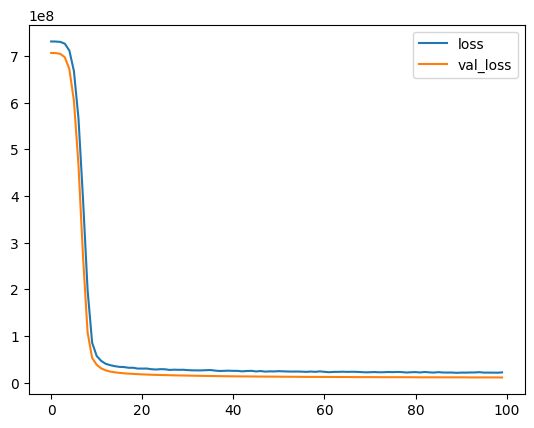

In [23]:
kayip=pd.DataFrame(model.history.history)
kayip.plot()
#We don't need to keep epoch number high 25 will be enough

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
tahmin = model.predict(Xte)
mae = mean_absolute_error(yte,tahmin)
mse = mean_squared_error(yte,tahmin)
print(f" Mean Absolute Error: {mae} \n Mean Squeared Error: {mse}")

86/86 [==============================] - 0s 1ms/step
 Mean Absolute Error: 2269.9629498538548 
 Mean Squeared Error: 11714005.300139954


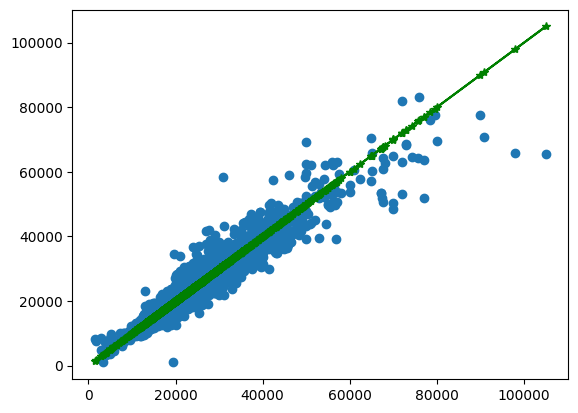

In [25]:
plt.scatter(yte,tahmin)
plt.plot(yte,yte,"g-*")